Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
[ 4.42843709e+01 -1.06169185e+02  9.39318395e+01 -3.34619449e+01
  2.42162440e+00  5.36296366e-01  2.02943290e-01 -7.48241664e-02
  1.14119983e-02 -2.30377067e-03 -2.50126252e-04  1.65798358e-05
  3.67381494e-06  2.19981103e-06 -8.12803226e-07  1.45344052e-07
 -1.19480922e-08 -1.95115951e-10  1.69590249e-09 -1.52963644e-10
  2.31618551e-11 -7.49695368e-12  1.09886654e-12 -1.34513817e-13
  3.89966834e-14 -1.75596361e-14  1.13307860e-15 -1.97059053e-16
  3.75914831e-17 -1.88885550e-18  1.46000504e-18 -6.69926305e-19
 -1.20518298e-19  5.05391194e-21 -1.07452753e-21  1.47715690e-22
 -2.57715538e-22  2.25000949e-23  3.85645614e-24  1.65694299e-24
 -7.09076638e-26  4.68629457e-27  1.42174771e-26 -1.83704664e-27
  3.91304218e-28  1.42349293e-29 -1.58950190e-29 -1.18537296e-30
  4.81898558e-31 -3.39820144e-32  5.45977005e-33 -5.90729598e-33
  2.1942088

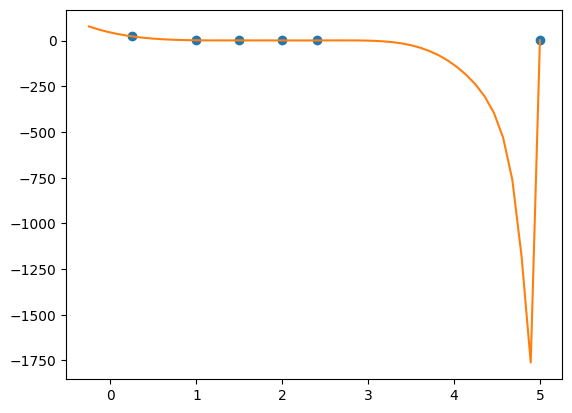

In [5]:
%pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt

def plot_difference_of_squares(x, y, grade):
    """
    Esta función ajusta un polinomio de grado 'grade' a los datos (x, y)
    utilizando el método de mínimos cuadrados y luego grafica los resultados.

    Parámetros:
    x : numpy.ndarray
        Array de valores x.
    y : numpy.ndarray
        Array de valores y correspondientes a x.
    grade : int
        Grado del polinomio a ajustar.

    Salida:
    Gráfico que muestra los datos originales y el polinomio ajustado.
    """
    Ax = np.array([x**i for i in range(grade + 1)])
    Am = np.dot(Ax, np.transpose(Ax))
    Aom = np.dot(y ,np.transpose(Ax))
    cG = np.linalg.solve(Am, Aom)
    print(cG)
    plt.plot(x, y, 'o')
    x0 = np.linspace(x[0] - 0.5, x[len(x)-1])
    plt.plot(x0, sum(cG[i] * x0**i for i in range(len(cG))))
    plt.show()

def main():
    """
    Función principal que define los datos y llama a plot_difference_of_squares
    para realizar el ajuste y la gráfica.
    """
    x = np.array([0.25, 1, 1.5, 2, 2.4, 5])
    y = np.array([23.1 ,1.68 ,1 ,0.84 ,0.826 ,1.2576])
    plot_difference_of_squares(x, y, 100)
if __name__ == '__main__':
    main()


# Aproximación de Cuadrados Mínimos mediante Álgebra Lineal

Este notebook demuestra cómo ajustar un polinomio a un conjunto de datos utilizando el método de mínimos cuadrados y álgebra lineal.

## Importar Bibliotecas

```python
import numpy as np
import matplotlib.pyplot as plt
```

## Fundamento Matemático

La idea detrás del método de mínimos cuadrados es encontrar los coeficientes
$( c_0, c_1, ..., c_n )$ que minimizan la suma de los cuadrados de las diferencias entre los valores observados $( y )$ y los valores predichos por el polinomio.

$$
S = \sum_{i=1}^{m} (y_i - P(x_i))^2
$$


Donde $( P(x) )$ es un polinomio de grado $( n )$ definido como:

$$
P(x) = c_0 + c_1 x + c_2 x^2 + ... + c_n x^n
$$



Utilizamos álgebra lineal para resolver este problema como un sistema de ecuaciones lineales de la forma $( A^T A c = A^T y )$, donde $( A )$ es la matriz de diseño y $( c )$ es el vector de coeficientes.

## Definir la Función de Ajuste

La función `plot_difference_of_squares` toma un conjunto de datos `x, y` y un grado `grade` para el polinomio. Luego ajusta un polinomio de ese grado a los datos y grafica tanto los datos como el polinomio ajustado.

```python
def plot_difference_of_squares(x, y, grade):
    """
    Esta función ajusta un polinomio de grado 'grade' a los datos (x, y)
    utilizando el método de mínimos cuadrados y luego grafica los resultados.
    """
    # ... (código)
```

## Función Principal

La función `main` define los datos `x` y `y` y llama a `plot_difference_of_squares`.

```python
def main():
    """
    Función principal que define los datos y llama a plot_difference_of_squares
    para realizar el ajuste y la gráfica.
    """
    # ... (código)
```

## Ejecución

Para ejecutar todo el código, simplemente corremos la función `main`.

```python
if __name__ == '__main__':
    main()
```


```python
if __name__ == '__main__':
    main()
```
